In [1]:
# standard
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import butter, sosfilt, filtfilt
from sklearn.manifold import TSNE

# internal
from graph_learning.methods import DiffusionGraphLearn
from graph_learning.utils import createWeightedGraph, unvectorize
from graph_learning.utils import plotMultiChannelSignals
from tma.utils import load_tma_data, read_from_csv, plot_recording
from data_handling.utils import plot_recording

In [3]:
%matplotlib inline

In [2]:
def plot_recording(data, fs):
    """
    plot the raw recordings from the acquisition system
    """
    fig = plt.figure()
    num_channels = data.shape[1]
    num_samples = data.shape[0]
    print(num_channels)
    axes = [fig.add_subplot('%i1' % num_channels + str(i)) for i in range(0, num_channels)]
    # [(ax.set_ylim([-100, 100])) for ax in axes]
    t = np.array(list(range(num_samples))) / fs
    for i in range(num_channels):
        axes[i].plot(t, data[:, i])
        i += 1
    plt.show()

def vectorize(Y):
    L = Y.shape[0]
    idx = np.triu_indices(L, 1)
    return Y[idx]

def rescale(X):
    """
    rescale a multi-channel window between [0, 1]
    """
    channel_max = np.max(X, axis=1, keepdims=True)
    return X / channel_max

/Users/ashwin/Current Work/GRNNmyo/data_handling/utils.py:133: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  axes = [fig.add_subplot('%i1' % num_channels + str(i)) for i in range(0, num_channels)]


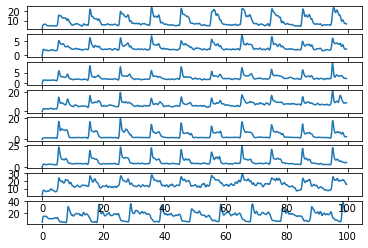

In [12]:
## get the recording
file = '/Users/ashwin/Current Work/GRNNmyo/data/subject_1001_Ashwin/HC_3.csv'
X = read_from_csv(file)
Fs = 200
X = np.abs(X)  # full wave rectification
b, a = butter(2, 1, 'lowpass', analog=False, fs=Fs, output='ba')  # define the low pass filter (Butterworth 2-order fc = 1Hz)
X = filtfilt(b, a, X, axis=1)
plot_recording(X, Fs)
plt.show()

/Users/ashwin/Current Work/GRNNmyo/data_handling/utils.py:133: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  axes = [fig.add_subplot('%i1' % num_channels + str(i)) for i in range(0, num_channels)]


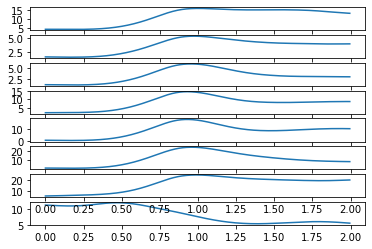

     pcost       dcost       gap    pres   dres
 0: -3.7705e+01 -7.6888e+00  7e+01  2e+01  2e-15
 1: -8.9926e+00 -6.8903e+00  5e+00  1e+00  7e-16
 2: -5.0951e+00 -5.2727e+00  6e-01  8e-02  5e-16
 3: -4.9353e+00 -4.9845e+00  7e-02  4e-03  9e-16
 4: -4.9452e+00 -4.9514e+00  7e-03  1e-04  4e-15
 5: -4.9477e+00 -4.9482e+00  5e-04  3e-06  2e-14
 6: -4.9480e+00 -4.9480e+00  4e-05  3e-08  2e-13
 7: -4.9480e+00 -4.9480e+00  8e-07  4e-10  2e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.7655e+01 -7.6856e+00  7e+01  2e+01  3e-15
 1: -8.9728e+00 -6.8175e+00  5e+00  1e+00  5e-16
 2: -5.0311e+00 -5.1597e+00  6e-01  9e-02  4e-16
 3: -4.8162e+00 -4.8662e+00  6e-02  1e-03  7e-16
 4: -4.8338e+00 -4.8391e+00  6e-03  5e-05  6e-15
 5: -4.8363e+00 -4.8367e+00  4e-04  6e-07  3e-14
 6: -4.8365e+00 -4.8365e+00  1e-05  6e-09  1e-13
 7: -4.8365e+00 -4.8365e+00  1e-07  6e-11  3e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.7579e+01 -7.6392e

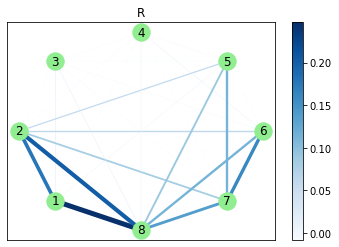

/Users/ashwin/Current Work/GRNNmyo/data_handling/utils.py:133: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  axes = [fig.add_subplot('%i1' % num_channels + str(i)) for i in range(0, num_channels)]


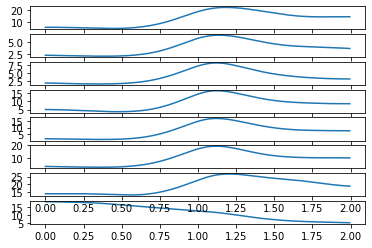

     pcost       dcost       gap    pres   dres
 0: -3.7837e+01 -7.8419e+00  7e+01  2e+01  4e-15
 1: -8.8936e+00 -6.8669e+00  5e+00  1e+00  7e-16
 2: -4.9010e+00 -5.0347e+00  6e-01  9e-02  4e-16
 3: -4.6929e+00 -4.7251e+00  3e-02  5e-04  7e-16
 4: -4.7050e+00 -4.7072e+00  2e-03  1e-05  4e-15
 5: -4.7058e+00 -4.7060e+00  2e-04  1e-07  5e-14
 6: -4.7059e+00 -4.7059e+00  2e-05  2e-10  1e-13
 7: -4.7059e+00 -4.7059e+00  1e-06  1e-12  5e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.7844e+01 -7.8334e+00  7e+01  2e+01  3e-15
 1: -8.8868e+00 -6.8405e+00  5e+00  1e+00  8e-16
 2: -4.9406e+00 -5.0420e+00  6e-01  9e-02  5e-16
 3: -4.7099e+00 -4.7392e+00  4e-02  2e-03  4e-16
 4: -4.7196e+00 -4.7221e+00  3e-03  3e-05  3e-15
 5: -4.7208e+00 -4.7210e+00  2e-04  2e-07  3e-14
 6: -4.7209e+00 -4.7209e+00  2e-05  2e-09  4e-13
 7: -4.7209e+00 -4.7209e+00  2e-06  2e-12  9e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.2481e+01 -3.4486e

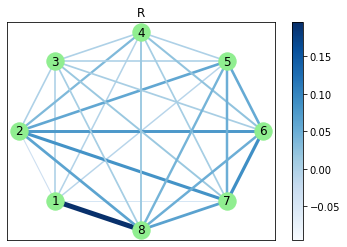

/Users/ashwin/Current Work/GRNNmyo/data_handling/utils.py:133: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  axes = [fig.add_subplot('%i1' % num_channels + str(i)) for i in range(0, num_channels)]


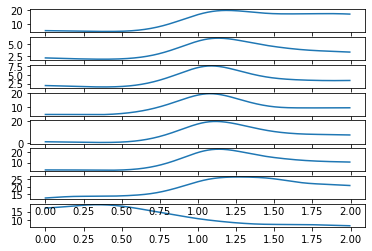

     pcost       dcost       gap    pres   dres
 0: -3.7828e+01 -7.7968e+00  7e+01  2e+01  3e-15
 1: -8.8974e+00 -6.9447e+00  5e+00  1e+00  5e-16
 2: -5.2176e+00 -5.3480e+00  6e-01  8e-02  4e-16
 3: -5.0495e+00 -5.0836e+00  4e-02  9e-04  6e-16
 4: -5.0656e+00 -5.0679e+00  2e-03  2e-05  8e-15
 5: -5.0667e+00 -5.0669e+00  2e-04  2e-07  6e-14
 6: -5.0668e+00 -5.0668e+00  2e-05  7e-10  5e-13
 7: -5.0668e+00 -5.0668e+00  7e-07  7e-12  9e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.7848e+01 -7.8398e+00  7e+01  2e+01  2e-15
 1: -8.9610e+00 -6.9544e+00  5e+00  1e+00  8e-16
 2: -5.1713e+00 -5.3162e+00  5e-01  7e-02  4e-16
 3: -5.0423e+00 -5.0740e+00  4e-02  9e-04  6e-16
 4: -5.0581e+00 -5.0601e+00  2e-03  1e-05  5e-15
 5: -5.0593e+00 -5.0594e+00  1e-04  2e-07  4e-14
 6: -5.0594e+00 -5.0594e+00  1e-05  1e-09  3e-13
 7: -5.0594e+00 -5.0594e+00  7e-07  1e-11  7e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.7563e+01 -7.5590e

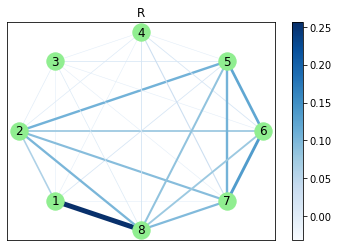

/Users/ashwin/Current Work/GRNNmyo/data_handling/utils.py:133: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  axes = [fig.add_subplot('%i1' % num_channels + str(i)) for i in range(0, num_channels)]


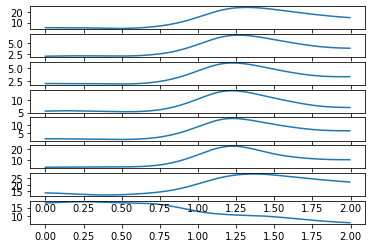

     pcost       dcost       gap    pres   dres
 0: -3.7724e+01 -7.6929e+00  7e+01  2e+01  3e-15
 1: -8.8181e+00 -6.8358e+00  5e+00  1e+00  6e-16
 2: -5.2371e+00 -5.3494e+00  5e-01  7e-02  5e-16
 3: -5.1210e+00 -5.1429e+00  3e-02  1e-03  5e-16
 4: -5.1329e+00 -5.1341e+00  1e-03  2e-05  5e-15
 5: -5.1337e+00 -5.1338e+00  8e-05  1e-07  9e-14
 6: -5.1337e+00 -5.1337e+00  1e-05  1e-09  1e-12
 7: -5.1337e+00 -5.1337e+00  8e-07  3e-16  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.0756e+01 -2.1174e+00  7e+01  2e+01  3e-15
 1: -3.6520e+00 -1.8691e+00  5e+00  1e+00  5e-16
 2: -1.2544e+00 -1.3038e+00  4e-01  7e-02  4e-16
 3: -1.2036e+00 -1.2148e+00  1e-02  5e-04  8e-16
 4: -1.2126e+00 -1.2129e+00  3e-04  6e-06  4e-15
 5: -1.2129e+00 -1.2129e+00  3e-06  6e-08  2e-14
 6: -1.2129e+00 -1.2129e+00  3e-08  6e-10  3e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.1846e+01 -3.1406e+00  7e+01  2e+01  3e-15
 1: -4.7727e+00 -2.8176e

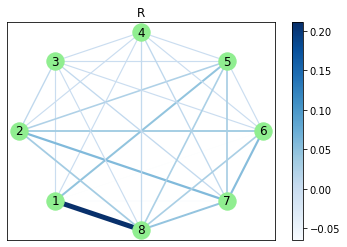

/Users/ashwin/Current Work/GRNNmyo/data_handling/utils.py:133: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  axes = [fig.add_subplot('%i1' % num_channels + str(i)) for i in range(0, num_channels)]


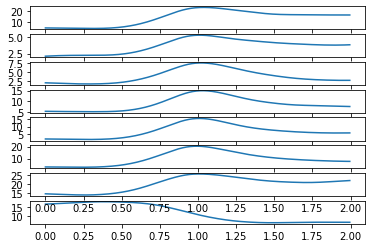

     pcost       dcost       gap    pres   dres
 0: -3.7716e+01 -7.6893e+00  7e+01  2e+01  3e-15
 1: -8.7957e+00 -6.8363e+00  5e+00  1e+00  6e-16
 2: -5.2345e+00 -5.3502e+00  5e-01  8e-02  4e-16
 3: -5.0795e+00 -5.1059e+00  3e-02  8e-04  7e-16
 4: -5.0915e+00 -5.0931e+00  2e-03  7e-06  5e-15
 5: -5.0923e+00 -5.0924e+00  7e-05  7e-08  5e-14
 6: -5.0924e+00 -5.0924e+00  2e-06  7e-10  3e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.7778e+01 -7.7314e+00  7e+01  2e+01  4e-15
 1: -8.9144e+00 -6.8572e+00  5e+00  1e+00  8e-16
 2: -5.2501e+00 -5.3274e+00  6e-01  1e-01  4e-16
 3: -5.0345e+00 -5.0604e+00  3e-02  1e-03  5e-16
 4: -5.0454e+00 -5.0470e+00  2e-03  1e-05  4e-15
 5: -5.0465e+00 -5.0465e+00  5e-05  1e-07  3e-14
 6: -5.0465e+00 -5.0465e+00  5e-07  1e-09  1e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.7645e+01 -7.5030e+00  8e+01  2e+01  4e-15
 1: -8.6344e+00 -6.7601e+00  5e+00  1e+00  8e-16
 2: -5.1205e+00 -5.2668e

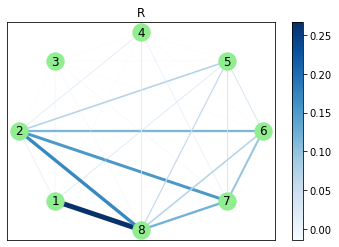

/Users/ashwin/Current Work/GRNNmyo/data_handling/utils.py:133: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  axes = [fig.add_subplot('%i1' % num_channels + str(i)) for i in range(0, num_channels)]


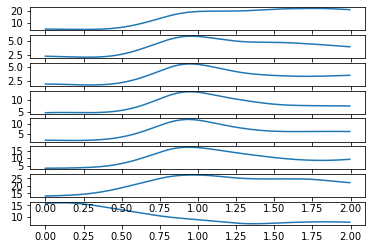

     pcost       dcost       gap    pres   dres
 0: -3.7564e+01 -7.4408e+00  7e+01  2e+01  3e-15
 1: -8.5626e+00 -6.5452e+00  5e+00  1e+00  6e-16
 2: -4.9357e+00 -5.0649e+00  6e-01  8e-02  4e-16
 3: -4.7982e+00 -4.8272e+00  3e-02  9e-04  5e-16
 4: -4.8111e+00 -4.8130e+00  2e-03  1e-05  5e-15
 5: -4.8124e+00 -4.8126e+00  1e-04  2e-07  8e-14
 6: -4.8125e+00 -4.8125e+00  4e-06  2e-09  3e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.7538e+01 -7.3245e+00  7e+01  2e+01  3e-15
 1: -8.4056e+00 -6.4642e+00  5e+00  1e+00  7e-16
 2: -4.9344e+00 -5.0424e+00  6e-01  8e-02  3e-16
 3: -4.7715e+00 -4.7985e+00  3e-02  4e-04  7e-16
 4: -4.7840e+00 -4.7857e+00  2e-03  5e-06  7e-15
 5: -4.7848e+00 -4.7849e+00  1e-04  7e-08  9e-14
 6: -4.7849e+00 -4.7849e+00  8e-06  6e-10  7e-13
 7: -4.7849e+00 -4.7849e+00  2e-07  6e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.7364e+01 -6.9647e+00  8e+01  2e+01  3e-15
 1: -8.3964e+00 -6.2806e

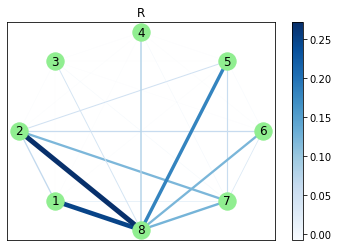

/Users/ashwin/Current Work/GRNNmyo/data_handling/utils.py:133: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  axes = [fig.add_subplot('%i1' % num_channels + str(i)) for i in range(0, num_channels)]


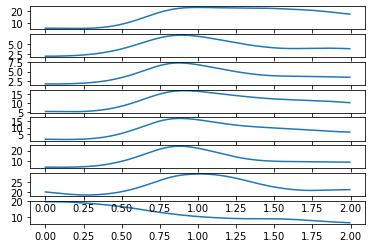

     pcost       dcost       gap    pres   dres
 0: -3.7648e+01 -7.6329e+00  7e+01  2e+01  3e-15
 1: -8.7111e+00 -6.7677e+00  5e+00  1e+00  7e-16
 2: -5.0567e+00 -5.1723e+00  6e-01  1e-01  5e-16
 3: -4.8553e+00 -4.8922e+00  5e-02  3e-03  5e-16
 4: -4.8681e+00 -4.8719e+00  4e-03  4e-05  5e-15
 5: -4.8703e+00 -4.8706e+00  4e-04  4e-07  3e-14
 6: -4.8705e+00 -4.8705e+00  3e-05  2e-09  3e-13
 7: -4.8705e+00 -4.8705e+00  1e-06  1e-11  6e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.7728e+01 -7.7275e+00  7e+01  2e+01  4e-15
 1: -8.7896e+00 -6.8233e+00  5e+00  1e+00  7e-16
 2: -5.0325e+00 -5.1669e+00  6e-01  9e-02  5e-16
 3: -4.8498e+00 -4.8856e+00  4e-02  2e-03  5e-16
 4: -4.8629e+00 -4.8659e+00  3e-03  3e-05  4e-15
 5: -4.8642e+00 -4.8644e+00  2e-04  3e-07  3e-14
 6: -4.8642e+00 -4.8643e+00  2e-05  3e-09  3e-13
 7: -4.8642e+00 -4.8642e+00  4e-07  2e-11  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.7209e+01 -7.2628e

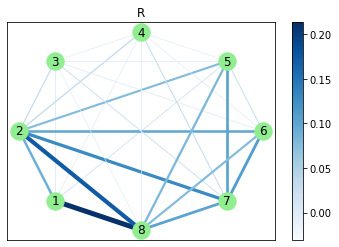

/Users/ashwin/Current Work/GRNNmyo/data_handling/utils.py:133: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  axes = [fig.add_subplot('%i1' % num_channels + str(i)) for i in range(0, num_channels)]


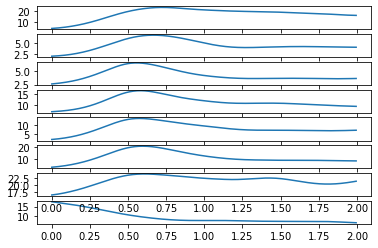

     pcost       dcost       gap    pres   dres
 0: -3.7635e+01 -7.6658e+00  7e+01  2e+01  3e-15
 1: -9.0175e+00 -6.7444e+00  6e+00  1e+00  7e-16
 2: -4.7571e+00 -4.8975e+00  6e-01  9e-02  4e-16
 3: -4.5682e+00 -4.5996e+00  5e-02  4e-03  7e-16
 4: -4.5722e+00 -4.5750e+00  3e-03  1e-04  2e-15
 5: -4.5737e+00 -4.5739e+00  2e-04  1e-06  3e-14
 6: -4.5738e+00 -4.5738e+00  2e-05  2e-08  2e-13
 7: -4.5738e+00 -4.5738e+00  2e-06  2e-10  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.7677e+01 -7.6832e+00  7e+01  2e+01  3e-15
 1: -8.9524e+00 -6.7768e+00  5e+00  1e+00  8e-16
 2: -4.8021e+00 -4.9414e+00  6e-01  9e-02  4e-16
 3: -4.6118e+00 -4.6462e+00  5e-02  3e-03  6e-16
 4: -4.6191e+00 -4.6229e+00  5e-03  2e-04  5e-15
 5: -4.6208e+00 -4.6210e+00  3e-04  8e-06  2e-14
 6: -4.6209e+00 -4.6209e+00  1e-05  1e-07  7e-14
 7: -4.6209e+00 -4.6209e+00  1e-07  1e-09  3e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.7260e+01 -7.2697e

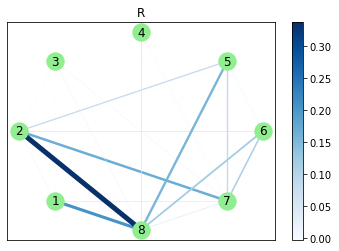

/Users/ashwin/Current Work/GRNNmyo/data_handling/utils.py:133: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  axes = [fig.add_subplot('%i1' % num_channels + str(i)) for i in range(0, num_channels)]


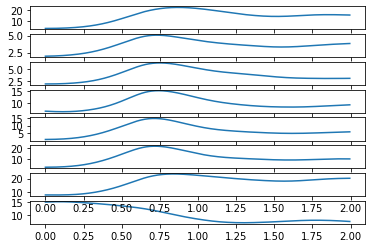

     pcost       dcost       gap    pres   dres
 0: -3.7671e+01 -7.7169e+00  7e+01  2e+01  3e-15
 1: -8.8040e+00 -6.8110e+00  5e+00  1e+00  7e-16
 2: -4.8626e+00 -5.0103e+00  6e-01  9e-02  5e-16
 3: -4.6659e+00 -4.7051e+00  5e-02  1e-03  4e-16
 4: -4.6823e+00 -4.6853e+00  3e-03  9e-06  6e-15
 5: -4.6837e+00 -4.6839e+00  2e-04  8e-08  3e-14
 6: -4.6838e+00 -4.6838e+00  2e-05  6e-10  2e-13
 7: -4.6838e+00 -4.6838e+00  1e-06  7e-12  6e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.7723e+01 -7.7213e+00  7e+01  2e+01  3e-15
 1: -8.8598e+00 -6.8121e+00  5e+00  1e+00  6e-16
 2: -4.8616e+00 -5.0039e+00  6e-01  9e-02  5e-16
 3: -4.6621e+00 -4.7030e+00  5e-02  2e-03  8e-16
 4: -4.6762e+00 -4.6799e+00  4e-03  3e-05  6e-15
 5: -4.6779e+00 -4.6781e+00  2e-04  2e-07  5e-14
 6: -4.6780e+00 -4.6780e+00  1e-05  2e-09  1e-13
 7: -4.6780e+00 -4.6780e+00  3e-07  2e-11  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.7491e+01 -7.3797e

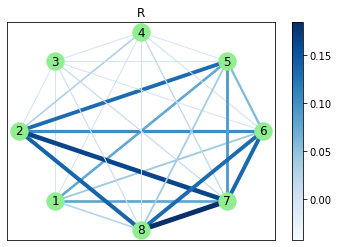

/Users/ashwin/Current Work/GRNNmyo/data_handling/utils.py:133: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  axes = [fig.add_subplot('%i1' % num_channels + str(i)) for i in range(0, num_channels)]


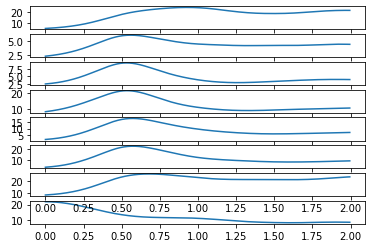

     pcost       dcost       gap    pres   dres
 0: -3.7749e+01 -7.7546e+00  7e+01  2e+01  3e-15
 1: -8.8878e+00 -6.8639e+00  5e+00  1e+00  5e-16
 2: -4.9479e+00 -5.0910e+00  7e-01  1e-01  4e-16
 3: -4.7255e+00 -4.7738e+00  6e-02  2e-03  5e-16
 4: -4.7409e+00 -4.7443e+00  4e-03  3e-05  8e-15
 5: -4.7423e+00 -4.7424e+00  2e-04  6e-07  3e-14
 6: -4.7423e+00 -4.7423e+00  5e-06  6e-09  1e-13
 7: -4.7423e+00 -4.7423e+00  5e-08  6e-11  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.7774e+01 -7.8027e+00  7e+01  2e+01  2e-15
 1: -8.9258e+00 -6.8707e+00  5e+00  1e+00  5e-16
 2: -4.7308e+00 -4.9503e+00  6e-01  8e-02  5e-16
 3: -4.5858e+00 -4.6341e+00  6e-02  2e-03  1e-15
 4: -4.5975e+00 -4.6020e+00  5e-03  4e-05  8e-15
 5: -4.5994e+00 -4.5996e+00  2e-04  9e-07  3e-14
 6: -4.5995e+00 -4.5995e+00  3e-06  9e-09  1e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.2814e+01 -3.6991e+00  7e+01  2e+01  5e-15
 1: -5.2222e+00 -3.4168e

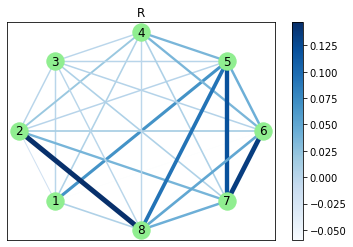

In [13]:
## select a replicate
start_time = np.array([4.5, 14.5, 24.5, 34.5, 44.5, 54.5, 64.5, 74.5, 84.5, 94.5])
end_time = start_time + 2

Z = np.empty((0, 28))
for i in range(len(start_time)):
    X_roi = X[:, int(start_time[i]*Fs): int(end_time[i]*Fs)]
    plot_recording(X_roi, Fs)
    plt.show()

    ## learn a graph
    GL = DiffusionGraphLearn(X=X_roi,
                            p=5,  
                            beta_1=10,
                            beta_2=0.1 
                            )

    W = GL.findGraphLaplacian()
    createWeightedGraph(W, title='R')
    plt.show()

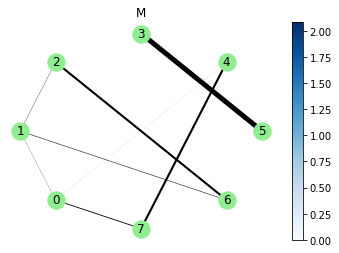

In [86]:
z = np.mean(Z, axis=0)
W = unvectorize(z.squeeze())
createWeightedGraph(W, semgConfig=True, title='M')

In [49]:
Z_HC = Z
Zo = np.concatenate((Z_M, Z_R, Z_HC), axis=0)
print(Zo.shape)

(30, 28)


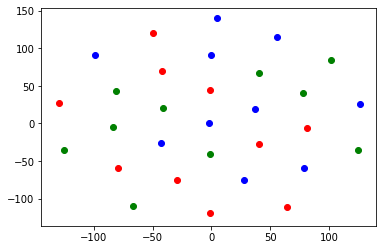

In [57]:
## visualize latent space
Zr = TSNE(n_components=2, perplexity=50).fit_transform(Zo)
plt.scatter(Zr[:10, 0], Zr[:10, 1], c='b')
plt.scatter(Zr[10:20, 0], Zr[10:20, 1], c='r')
plt.scatter(Zr[20:, 0], Zr[20:, 1], c='g')
plt.show()

In [32]:
def unvectorize(y):
    """
    Form a symmetrical matrix $Y \in \mathbb{R}^{m \times m}$ where
    diag(Y) = 0 given an array $y \in \mathbb{m(m-1)/2}$
    """
    L = 4
    Y = np.zeros((L, L))
    i, j = np.triu_indices(L, 1)
    Y[i, j] = y
    Y[j, i] = y
    return Y

a = np.arange(1, 7, 1)
A = unvectorize(a)
print(A)

[[0. 1. 2. 3.]
 [1. 0. 4. 5.]
 [2. 4. 0. 6.]
 [3. 5. 6. 0.]]


In [1]:
import numpy as np

In [3]:
A = np.arange(1, 17, 1).reshape(4, 4)
print(A)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


In [6]:
np.mean(A, axis=1, keepdims=True) * np.ones((4, 4))

array([[ 2.5,  2.5,  2.5,  2.5],
       [ 6.5,  6.5,  6.5,  6.5],
       [10.5, 10.5, 10.5, 10.5],
       [14.5, 14.5, 14.5, 14.5]])

In [11]:
a = A[0]
a

array([1, 2, 3, 4])

In [13]:
A = np.ones((100, 8, 8))

In [15]:
abs(-1)

1

In [6]:
def getEllipticalCoordinates():
    """
    The coordinates of the nodes (electrodes in this case)
    """
    pos = { 0: (-2*2**0.5, -1.5*2**0.5),
            1: (-4, 0),
            2: (-2*2**0.5, 1.5*2**0.5),
            3: (0, 3),
            4: (2*2**0.5, 1.5*2**0.5),
            5: (4,0),
            6: (2*2**0.5, -1.5*2**0.5),
            7: (0, -3)
    }
    return pos

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl

def createWeightedGraph(W, *argv):
    """
    create a network topolgy given its Adjacency matrix
    """
    m = W.shape[0]
    pos = getEllipticalCoordinates()
    fig = plt.figure(facecolor="w")
    ax = fig.add_subplot(111)
    
    if W[W < 0].size == 0:
        graphIsUndirected = True
        graphIsDirected = False
    else:    
        graphIsUndirected = False
        graphIsDirected = True

    if graphIsDirected:
        ## plot directed weighted graph
        G = nx.DiGraph()
        for i in range(0, m):
            for j in range(0, m):
                G.add_edge(i, j, weight=W[i, j])

        ePos = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 0]
        eNeg = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] < 0]

        posWeights = [abs(d["weight"]) for (u, v, d) in G.edges(data=True) if d["weight"] >= 0]
        negWeights = [abs(d["weight"]) for (u, v, d) in G.edges(data=True) if d["weight"] < 0]

        posColors = (posWeights - min(posWeights))/(max(posWeights)-min(posWeights))
        negColors = (negWeights - min(negWeights))/(max(negWeights)-min(negWeights))

        # plot the graph
        nx.draw_networkx_nodes(G, pos, with_labels=True, node_color='lightgreen', ax=ax)
        nx.draw_networkx_edges(G, pos, edgelist=ePos, arrows=True, arrowsize=20, arrowstyle='-|>',
                            width=2,
                            edge_color=posColors,
                            edge_cmap=plt.cm.Blues,
                            edge_vmin=min(posColors),
                            edge_vmax=max(posColors),
                            connectionstyle='arc3, rad = 0.1',
                            ax=ax)

        nx.draw_networkx_edges(G, pos, edgelist=eNeg, arrows=True, arrowsize=20, arrowstyle='-|>',
                            width=2,
                            edge_color=negColors,
                            edge_cmap=plt.cm.Reds,
                            edge_vmin=min(negColors),
                            edge_vmax=max(negColors),
                            connectionstyle='arc3, rad = 0.1',
                            ax=ax)
        
        nx.draw_networkx_labels(G, pos)
            
        # add colorbars
        posNorm = mpl.colors.Normalize(vmin=min(posWeights), vmax=max(posWeights))
        negNorm = mpl.colors.Normalize(vmin=min(negWeights), vmax=max(negWeights))

        posMap = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=posNorm)
        negMap = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=negNorm)
        plt.colorbar(posMap)
        plt.colorbar(negMap)
        if argv is not None:
            plt.title(argv[0])
        plt.show()

    if graphIsUndirected:
        ## plot unidrected weighted graph
        G = nx.Graph()
        for i in range(0, m):
            for j in range(0, m):
                G.add_edge(i, j, weight=W[i, j])

        weights = list(nx.get_edge_attributes(G,'weight').values())
        line_widths = (weights - min(weights))/(max(weights)-min(weights))*5
        edge_colors = (weights - min(weights))/(max(weights)-min(weights))

        # plot the graph
        nx.draw(G, pos, 
            width=list(line_widths),
            with_labels=True,
            edge_color=list(edge_colors),
            edge_cmap=plt.cm.Blues,
            edge_vmin=min(edge_colors),
            edge_vmax=max(edge_colors),
            node_color='lightgreen',
            ax=ax)
            
        ## add a colorbar
        norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
        weightMap = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=norm)
        plt.axis('on')
        plt.colorbar(weightMap)
        if argv is not None:
            plt.title(argv[0])
        plt.show()  


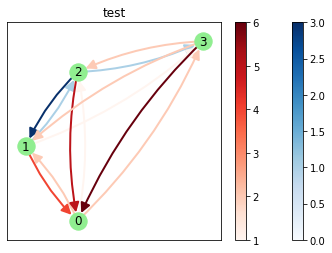

In [134]:
W = np.array([[1, -2, -1, -2],
              [-4, 0, 1, -1],
              [-5, 3, 0, 1],
              [-6, -2, -2, 0]])
createWeightedGraph(W, 'test')

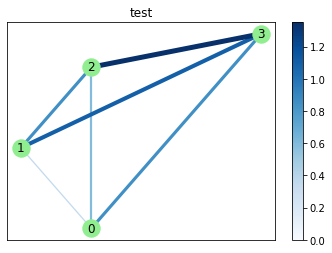

In [127]:
A = np.arange(0.1, 1.7, 0.1).reshape(4, 4)
W = (A.T + A)/2
np.fill_diagonal(W, 0)
createWeightedGraph(W, 'test')

In [130]:
A = np.random.randn(4, 4)
A

array([[ 1.03597413,  0.24353863, -1.19618173,  2.30980738],
       [ 1.35684563,  1.4828713 , -1.22218332,  0.62047095],
       [ 1.39239612,  0.08627546, -0.09582822, -0.66930865],
       [-0.37223824, -1.44430028,  1.70419605,  0.81327183]])

In [133]:
A/ np.max(abs(A))

array([[ 0.44851105,  0.10543677, -0.51787077,  1.        ],
       [ 0.58742805,  0.64198916, -0.52912781,  0.26862454],
       [ 0.60281915,  0.0373518 , -0.04148754, -0.28976817],
       [-0.16115553, -0.62529036,  0.73780873,  0.35209509]])

In [11]:
def createWeightedGraph(W, graphIsDirected, *argv):
    """
    create a network topolgy given its Adjacency matrix
    """
    m = W.shape[0]
    pos = getEllipticalCoordinates()
    fig = plt.figure(facecolor="w")
    ax = fig.add_subplot(111)

    if graphIsDirected:
        ## plot directed weighted graph
        G = nx.DiGraph()
        for i in range(0, m):
            for j in range(0, m):
                G.add_edge(i, j, weight=W[i, j])

        ePos = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 0]
        eNeg = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] < 0]

        weights = list(nx.get_edge_attributes(G,'weight').values())
        weightColors = (weights - min(weights))/(max(weights)-min(weights))

        # plot the graph
        nx.draw_networkx_nodes(G, pos, 
                                with_labels=True, 
                                node_color='lightgreen', 
                                ax=ax)
        nx.draw_networkx_edges(G, pos, 
                                arrows=True, arrowsize=20, arrowstyle='-|>',
                                width=2,
                                edge_color=weightColors,
                                edge_cmap=plt.cm.Blues,
                                edge_vmin=min(weightColors),
                                edge_vmax=max(weightColors),
                                connectionstyle='arc3, rad = 0.1',
                                ax=ax)
        nx.draw_networkx_labels(G, pos)
            
        # add colorbar
        norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
        weightMap = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=norm)
        plt.axis('on')
        plt.colorbar(weightMap)
        if argv is not None:
            plt.title(argv[0])
        plt.show()

    else:
        ## plot unidrected weighted graph
        G = nx.Graph()
        for i in range(0, m):
            for j in range(0, m):
                G.add_edge(i, j, weight=W[i, j])

        weights = list(nx.get_edge_attributes(G,'weight').values())
        weightWidths = (weights - min(weights))/(max(weights)-min(weights))*5
        weightColors = (weights - min(weights))/(max(weights)-min(weights))

        # plot the graph
        nx.draw(G, pos, 
                    width=weightWidths,
                    with_labels=True,
                    edge_color=weightColors,
                    edge_cmap=plt.cm.Blues,
                    edge_vmin=min(weightColors),
                    edge_vmax=max(weightColors),
                    node_color='lightgreen',
                    ax=ax)
            
        ## add a colorbar
        norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
        weightMap = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=norm)
        plt.axis('on')
        plt.colorbar(weightMap)
        if argv is not None:
            plt.title(argv[0])
        plt.show()  


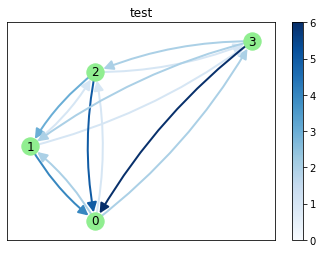

In [12]:
W = np.array([[1, 2, 1, 2],
              [-4, 0, 1, -1],
              [-5, 3, 0, 1],
              [-6, -2, -2, 0]])
W = abs(W)
createWeightedGraph(W, True, 'test')

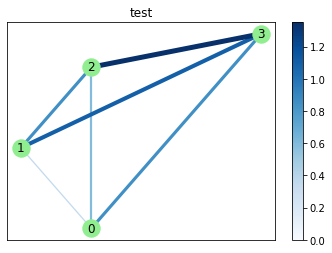

In [13]:
A = np.arange(0.1, 1.7, 0.1).reshape(4, 4)
W = (A.T + A)/2
np.fill_diagonal(W, 0)
createWeightedGraph(W, False, 'test')

In [2]:
from scipy.stats import t
p = 0.025
df = 24
value = t.ppf(p, df)
# p = t.cdf(, df)
print(value)

-2.063898561628021


In [1]:
import numpy as np

In [128]:
A = np.arange(0, 16, 1).reshape(4, 4)

In [129]:
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [132]:
from scipy.linalg import khatri_rao

In [130]:
B = (A.T + A)/2
np.fill_diagonal(B, 0)
B

array([[ 0. ,  2.5,  5. ,  7.5],
       [ 2.5,  0. ,  7.5, 10. ],
       [ 5. ,  7.5,  0. , 12.5],
       [ 7.5, 10. , 12.5,  0. ]])

In [136]:
U, V = np.linalg.eig(B)
W = khatri_rao(V, V)
U

array([ 23.52875343,  -2.26897745,  -7.86760037, -13.39217561])

In [139]:
np.matmul(W, U)

array([ 3.99680289e-15,  2.50000000e+00,  5.00000000e+00,  7.50000000e+00,
        2.50000000e+00,  5.77315973e-15,  7.50000000e+00,  1.00000000e+01,
        5.00000000e+00,  7.50000000e+00, -2.22044605e-15,  1.25000000e+01,
        7.50000000e+00,  1.00000000e+01,  1.25000000e+01, -1.77635684e-15])

In [142]:
idx = [0, 5, 10, 15]
Wd = W[idx]
Wd
np.linalg.matrix_rank(Wd)

3

In [104]:
D

array([ 0,  5, 10, 15])

In [105]:
Dcomp

array([ 1,  2,  3,  4,  6,  7,  8,  9, 11, 12, 13, 14])

In [ ]:
A[Dcomp]

In [8]:
import numpy as np
A = np.arange(0, 64, 1).reshape(8, 8).T
A

array([[ 0,  8, 16, 24, 32, 40, 48, 56],
       [ 1,  9, 17, 25, 33, 41, 49, 57],
       [ 2, 10, 18, 26, 34, 42, 50, 58],
       [ 3, 11, 19, 27, 35, 43, 51, 59],
       [ 4, 12, 20, 28, 36, 44, 52, 60],
       [ 5, 13, 21, 29, 37, 45, 53, 61],
       [ 6, 14, 22, 30, 38, 46, 54, 62],
       [ 7, 15, 23, 31, 39, 47, 55, 63]])

In [9]:
D = np.diag(A)
D

array([ 0,  9, 18, 27, 36, 45, 54, 63])

In [14]:
Dcomp = A[np.triu_indices(8, 1)]
Dcomp

array([ 8, 16, 24, 32, 40, 48, 56, 17, 25, 33, 41, 49, 57, 26, 34, 42, 50,
       58, 35, 43, 51, 59, 44, 52, 60, 53, 61, 62])

In [17]:
A[np.tril_indices(8, -1)]

array([ 1,  2, 10,  3, 11, 19,  4, 12, 20, 28,  5, 13, 21, 29, 37,  6, 14,
       22, 30, 38, 46,  7, 15, 23, 31, 39, 47, 55])

In [13]:
for i in range(len(D)):
    if 

IndexError: index 36 is out of bounds for axis 0 with size 36

In [113]:
D = np.diag(np.arange(0, 8**2, 1).reshape(8, 8))

In [114]:
D

array([ 0,  9, 18, 27, 36, 45, 54, 63])

In [117]:
Dcomp = np.delete(a, D)

In [118]:
Dcomp

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 19,
       20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38,
       39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57,
       58, 59, 60, 61, 62])

In [119]:
B = np.arange(0, 6.4, 0.1).reshape(8, 8)
B = (B.T + B)/2
np.fill_diagonal(B, 0)
B

array([[0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15],
       [0.45, 0.  , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 ],
       [0.9 , 1.35, 0.  , 2.25, 2.7 , 3.15, 3.6 , 4.05],
       [1.35, 1.8 , 2.25, 0.  , 3.15, 3.6 , 4.05, 4.5 ],
       [1.8 , 2.25, 2.7 , 3.15, 0.  , 4.05, 4.5 , 4.95],
       [2.25, 2.7 , 3.15, 3.6 , 4.05, 0.  , 4.95, 5.4 ],
       [2.7 , 3.15, 3.6 , 4.05, 4.5 , 4.95, 0.  , 5.85],
       [3.15, 3.6 , 4.05, 4.5 , 4.95, 5.4 , 5.85, 0.  ]])

In [121]:
b = B.reshape(-1)
b

array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 0.45, 0.  , 1.35,
       1.8 , 2.25, 2.7 , 3.15, 3.6 , 0.9 , 1.35, 0.  , 2.25, 2.7 , 3.15,
       3.6 , 4.05, 1.35, 1.8 , 2.25, 0.  , 3.15, 3.6 , 4.05, 4.5 , 1.8 ,
       2.25, 2.7 , 3.15, 0.  , 4.05, 4.5 , 4.95, 2.25, 2.7 , 3.15, 3.6 ,
       4.05, 0.  , 4.95, 5.4 , 2.7 , 3.15, 3.6 , 4.05, 4.5 , 4.95, 0.  ,
       5.85, 3.15, 3.6 , 4.05, 4.5 , 4.95, 5.4 , 5.85, 0.  ])

In [32]:
b[D]

IndexError: index 9 is out of bounds for axis 0 with size 3

In [123]:
b[Dcomp]

array([0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 0.45, 1.35, 1.8 , 2.25,
       2.7 , 3.15, 3.6 , 0.9 , 1.35, 2.25, 2.7 , 3.15, 3.6 , 4.05, 1.35,
       1.8 , 2.25, 3.15, 3.6 , 4.05, 4.5 , 1.8 , 2.25, 2.7 , 3.15, 4.05,
       4.5 , 4.95, 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.95, 5.4 , 2.7 , 3.15,
       3.6 , 4.05, 4.5 , 4.95, 5.85, 3.15, 3.6 , 4.05, 4.5 , 4.95, 5.4 ,
       5.85])

In [124]:
b[Dcomp].reshape(56, 1)

array([[0.45],
       [0.9 ],
       [1.35],
       [1.8 ],
       [2.25],
       [2.7 ],
       [3.15],
       [0.45],
       [1.35],
       [1.8 ],
       [2.25],
       [2.7 ],
       [3.15],
       [3.6 ],
       [0.9 ],
       [1.35],
       [2.25],
       [2.7 ],
       [3.15],
       [3.6 ],
       [4.05],
       [1.35],
       [1.8 ],
       [2.25],
       [3.15],
       [3.6 ],
       [4.05],
       [4.5 ],
       [1.8 ],
       [2.25],
       [2.7 ],
       [3.15],
       [4.05],
       [4.5 ],
       [4.95],
       [2.25],
       [2.7 ],
       [3.15],
       [3.6 ],
       [4.05],
       [4.95],
       [5.4 ],
       [2.7 ],
       [3.15],
       [3.6 ],
       [4.05],
       [4.5 ],
       [4.95],
       [5.85],
       [3.15],
       [3.6 ],
       [4.05],
       [4.5 ],
       [4.95],
       [5.4 ],
       [5.85]])

In [73]:
w = np.zeros((8*8, ))
w[Dcomp] = Dcomp
w

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  0., 10., 11., 12.,
       13., 14., 15., 16., 17.,  0., 19., 20., 21., 22., 23., 24., 25.,
       26.,  0., 28., 29., 30., 31., 32., 33., 34., 35.,  0., 37., 38.,
       39., 40., 41., 42., 43., 44.,  0., 46., 47., 48., 49., 50., 51.,
       52., 53.,  0., 55., 56., 57., 58., 59., 60., 61., 62.,  0.])

In [74]:
w.reshape(8, 8)

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
       [ 8.,  0., 10., 11., 12., 13., 14., 15.],
       [16., 17.,  0., 19., 20., 21., 22., 23.],
       [24., 25., 26.,  0., 28., 29., 30., 31.],
       [32., 33., 34., 35.,  0., 37., 38., 39.],
       [40., 41., 42., 43., 44.,  0., 46., 47.],
       [48., 49., 50., 51., 52., 53.,  0., 55.],
       [56., 57., 58., 59., 60., 61., 62.,  0.]])

In [69]:
K==1

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [ True, False,  True,  True,  True,  True,  True,  True],
       [ True,  True, False,  True,  True,  True,  True,  True],
       [ True,  True,  True, False,  True,  True,  True,  True],
       [ True,  True,  True,  True, False,  True,  True,  True],
       [ True,  True,  True,  True,  True, False,  True,  True],
       [ True,  True,  True,  True,  True,  True, False,  True],
       [ True,  True,  True,  True,  True,  True,  True, False]])

In [20]:
A.reshape(8, 8)[i]

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

In [21]:
A

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [29]:
len(Dcomp)

56

In [35]:
e1 = np.zeros((8, 1))
e1[0] = 1

In [36]:
l = np.ones((8-1, 1))

In [37]:
k = np.kron(e1, l)

In [40]:
len(k)

56

In [35]:
import numpy as np
a = np.arange(1, 4, 1)
a.shape
np.expand_dims(a, -1).shape

(3, 1)

In [50]:
a = np.arange(1, 10, 1)

In [51]:
a

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [55]:
np.insert(a, [2, 4, 6], [20, 20, 20])

array([ 1,  2, 20,  3,  4, 20,  5,  6, 20,  7,  8,  9])

In [49]:
print([[1], [2]])

[[1], [2]]


In [36]:
import numpy as np

In [79]:
A = np.arange(1, 17, 1).reshape(4, 4)
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [101]:
B = (A.T + A)/2
np.fill_diagonal(B, 0)
B

array([[ 0. ,  3.5,  6. ,  8.5],
       [ 3.5,  0. ,  8.5, 11. ],
       [ 6. ,  8.5,  0. , 13.5],
       [ 8.5, 11. , 13.5,  0. ]])

In [93]:
np.matmul(B, np.diag(np.array([1, 2, 3, 4])))

array([[ 1. ,  7. , 18. , 34. ],
       [ 3.5,  2. , 25.5, 44. ],
       [ 6. , 17. ,  3. , 54. ],
       [ 8.5, 22. , 40.5,  4. ]])

In [102]:
print(B) 
U, V = np.linalg.eig(B)
S = np.zeros((4, 4))
for i in range(4):
    K = np.matmul(V[i].reshape(4, 1), V[i].reshape(4, 1).T)
    S += U[i]*K
S

[[ 0.   3.5  6.   8.5]
 [ 3.5  0.   8.5 11. ]
 [ 6.   8.5  0.  13.5]
 [ 8.5 11.  13.5  0. ]]


array([[ -4.57811023,  10.0503779 ,  -6.24636693,  -5.82497182],
       [ 10.0503779 ,  18.28634612,  -7.25577555,  -4.92856341],
       [ -6.24636693,  -7.25577555,  -3.06747404,   2.47247097],
       [ -5.82497182,  -4.92856341,   2.47247097, -10.64076185]])

In [74]:
U = np.diag(U)

In [75]:
np.matmul(np.matmul(V, U), V.T)

array([[ 6.99440506e-15,  3.50000000e+00,  6.00000000e+00,
         8.50000000e+00],
       [ 3.50000000e+00,  9.99200722e-16,  8.50000000e+00,
         1.10000000e+01],
       [ 6.00000000e+00,  8.50000000e+00,  3.55271368e-15,
         1.35000000e+01],
       [ 8.50000000e+00,  1.10000000e+01,  1.35000000e+01,
        -5.32907052e-15]])

In [40]:
def unvectorize(y):
    """
    Form a symmetrical matrix $Y \in \mathbb{R}^{m \times m}$ where
    diag(Y) = 0 given an array $y \in \mathbb{m(m-1)/2}$
    """
    L = 4
    Y = np.zeros((L, L))
    i, j = np.triu_indices(L, 1)
    Y[i, j] = y.squeeze()
    Y[j, i] = y.squeeze()
    return Y

In [52]:
A = np.arange(1, 17, 1).reshape(4, 4)
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [53]:
B = np.expand_dims(A[:, 1:].reshape(-1, order='F'), -1)
B 

array([[ 2],
       [ 6],
       [10],
       [14],
       [ 3],
       [ 7],
       [11],
       [15],
       [ 4],
       [ 8],
       [12],
       [16]])

In [76]:
a = np.arange(1, 17, 1)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [78]:
a.reshape(4, 4).T

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15],
       [ 4,  8, 12, 16]])

In [104]:
a = np.arange(0, 64, 1)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [105]:
a.reshape(8, 8).T

array([[ 0,  8, 16, 24, 32, 40, 48, 56],
       [ 1,  9, 17, 25, 33, 41, 49, 57],
       [ 2, 10, 18, 26, 34, 42, 50, 58],
       [ 3, 11, 19, 27, 35, 43, 51, 59],
       [ 4, 12, 20, 28, 36, 44, 52, 60],
       [ 5, 13, 21, 29, 37, 45, 53, 61],
       [ 6, 14, 22, 30, 38, 46, 54, 62],
       [ 7, 15, 23, 31, 39, 47, 55, 63]])

In [116]:
A = np.random.rand(10, 4)

In [117]:
A

array([[0.35013006, 0.69741948, 0.92618742, 0.57006316],
       [0.40736504, 0.58869992, 0.87022091, 0.83192947],
       [0.46164059, 0.29152942, 0.37589591, 0.59573539],
       [0.45103641, 0.89750859, 0.10236303, 0.33638395],
       [0.40116318, 0.67420123, 0.96481226, 0.93548796],
       [0.46390162, 0.09457282, 0.60208972, 0.9371273 ],
       [0.2601831 , 0.95375604, 0.86072414, 0.81239371],
       [0.64076341, 0.62331083, 0.62172065, 0.50138585],
       [0.66967575, 0.90334998, 0.96398537, 0.22406587],
       [0.66961867, 0.18728836, 0.68968304, 0.16442253]])

In [118]:
u = np.array([0, 1, 2, 3]).reshape(4, 1)

In [119]:
np.matmul(A, u)

array([[4.2599838 ],
       [4.82493013],
       [2.8305274 ],
       [2.1113865 ],
       [5.41028962],
       [4.11013417],
       [5.11238545],
       [3.3709097 ],
       [3.50351833],
       [2.05992203]])

In [122]:
np.matmul(A[:, 1:], u[1:])

array([[4.2599838 ],
       [4.82493013],
       [2.8305274 ],
       [2.1113865 ],
       [5.41028962],
       [4.11013417],
       [5.11238545],
       [3.3709097 ],
       [3.50351833],
       [2.05992203]])

In [1]:
import numpy as np 
A = np.arange(0, 24, 1).reshape(4, 6)

In [2]:
A

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [3]:
np.mean(A, axis=-1, keepdims=True)

array([[ 2.5],
       [ 8.5],
       [14.5],
       [20.5]])